**Importing The Libraries**

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import WhitespaceTokenizer
from collections import Counter
from nltk import ngrams
import re
import string
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords



**Importing the Data**

In [28]:
df = pd.read_csv('Fake.csv',encoding_errors='ignore')
df['label'] = 'Fake'
df

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obamas Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",Fake
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",Fake
23478,Sunnistan: US and Allied Safe Zone Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",Fake
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",Fake


In [29]:
df1 = pd.read_csv('True1.csv',encoding_errors='ignore')
df1['label'] = 'True'
df1

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True
...,...,...,...,...,...
21411,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",True
21412,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",True
21413,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",True
21414,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",True


In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21416 entries, 0 to 21415
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21416 non-null  object
 1   text     21416 non-null  object
 2   subject  21416 non-null  object
 3   date     21416 non-null  object
 4   label    21416 non-null  object
dtypes: object(5)
memory usage: 836.7+ KB


**Combine both the data using pd.concat function**

In [31]:
df3 = pd.concat([df,df1], ignore_index=True)
df3

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obamas Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake
...,...,...,...,...,...
44892,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",True
44893,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",True
44894,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",True
44895,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",True


**Shuffle the data using sample function**

In [32]:
df3 = df3.sample(frac=1).reset_index(drop=True)

In [6]:
df3.head(10)

,title,text,subject,date,label
0,Security for Trump's summer visit ruffles tran...,"BEDMINSTER, N.J. (Reuters) - Three military he...",politicsNews,"August 4, 2017",True
1,BREAKING: FREDDIE GRAY HEAD INJURY MATCHES BOL...,This answers questions but also raises many mo...,left-news,"Apr 30, 2015",Fake
2,Lebanon support group urges Lebanon to be shie...,BEIRUT (Reuters) - The International Support G...,worldnews,"November 10, 2017",True
3,U.S. marine accused of drunk driving after Jap...,TOKYO (Reuters) - A Japanese man was killed in...,worldnews,"November 20, 2017",True
4,Senate panel to vote next week on online sex-t...,WASHINGTON (Reuters) - The U.S. Senate Commerc...,politicsNews,"November 1, 2017",True
5,Japan detects radio signals pointing to possib...,TOKYO/WASHINGTON (Reuters) - Japan has detecte...,worldnews,"November 28, 2017",True
6,U.S. voting commission vice chair urged new vo...,WASHINGTON (Reuters) - The vice chairman of a ...,politicsNews,"October 6, 2017",True
7,Rich tycoon takes on Iraqi Kurdish leaders ove...,"SULAIMANIYA, Iraq (Reuters) - On the eve of an...",worldnews,"September 12, 2017",True
8,House panel approves legislation to speed depl...,WASHINGTON (Reuters) - An influential U.S. Hou...,politicsNews,"July 27, 2017",True
9,Trump issues first public condemnation of anti...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"February 21, 2017",True


In [33]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44897 entries, 0 to 44896
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44897 non-null  object
 1   text     44897 non-null  object
 2   subject  44897 non-null  object
 3   date     44897 non-null  object
 4   label    44897 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [34]:
df3.shape

(44897, 5)

**Checking the NA values**

In [35]:
df3.isna().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

**Checking the duplicated values**

In [36]:
df3.duplicated().sum()

209

**Droping the Duplicated Values**

In [37]:
df3.drop_duplicates(inplace=True)

In [38]:
df3.duplicated().sum()

0

**Converted the label(Categorical) col into Numerical col using the Labelencoder**

In [39]:
encoder = LabelEncoder()
df3['label'] = encoder.fit_transform(df3['label'])
df3

,title,text,subject,date,label
0,"Factbox: Conservative, liberal, progressive: M...",BERLIN (Reuters) - Germany s Angela Merkel beg...,worldnews,"September 25, 2017",1
1,BRILLIANT: [VIDEO] SHERIFF CLARKE EXPLAINS HOW...,Nothing like a good dose of Sheriff Clarke to ...,left-news,"Aug 23, 2015",0
2,RACIST LIBERAL REPORTER Arrested In Connection...,The media and the Democrat Party has been comi...,left-news,"Mar 3, 2017",0
3,"U.S. hands over 1,100 pages of Benghazi record...",WASHINGTON (Reuters) - The U.S. State Departme...,politicsNews,"April 8, 2016",1
4,Egyptian security forces kill five suspected m...,CAIRO (Reuters) - Egyptian security forces kil...,worldnews,"December 4, 2017",1
...,...,...,...,...,...
44892,Some nations affected by U.S. immigration orde...,WASHINGTON (Reuters) - Nationals from seven Mu...,politicsNews,"January 31, 2017",1
44893,German police check more suspicious parcels af...,BERLIN (Reuters) - German police on Monday inv...,worldnews,"December 4, 2017",1
44894,OBAMAS FAREWELL: FAKE TEARS Resurface For Fir...,Watch @POTUS teary tribute to his family. #Ob...,politics,"Jan 10, 2017",0
44895,EMBARRASSING: Pro-Gun Control Reporter Attempt...,What is it about liberal men that makes a woma...,left-news,"Jun 15, 2016",0


In [40]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44688 entries, 0 to 44896
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44688 non-null  object
 1   text     44688 non-null  object
 2   subject  44688 non-null  object
 3   date     44688 non-null  object
 4   label    44688 non-null  int32 
dtypes: int32(1), object(4)
memory usage: 1.9+ MB


**Calculated How many number of letters are available in every text**

In [41]:
df3['num_char'] = df3['text'].apply(len)
df3

,title,text,subject,date,label,num_char
0,"Factbox: Conservative, liberal, progressive: M...",BERLIN (Reuters) - Germany s Angela Merkel beg...,worldnews,"September 25, 2017",1,5482
1,BRILLIANT: [VIDEO] SHERIFF CLARKE EXPLAINS HOW...,Nothing like a good dose of Sheriff Clarke to ...,left-news,"Aug 23, 2015",0,2604
2,RACIST LIBERAL REPORTER Arrested In Connection...,The media and the Democrat Party has been comi...,left-news,"Mar 3, 2017",0,4664
3,"U.S. hands over 1,100 pages of Benghazi record...",WASHINGTON (Reuters) - The U.S. State Departme...,politicsNews,"April 8, 2016",1,837
4,Egyptian security forces kill five suspected m...,CAIRO (Reuters) - Egyptian security forces kil...,worldnews,"December 4, 2017",1,835
...,...,...,...,...,...,...
44892,Some nations affected by U.S. immigration orde...,WASHINGTON (Reuters) - Nationals from seven Mu...,politicsNews,"January 31, 2017",1,4011
44893,German police check more suspicious parcels af...,BERLIN (Reuters) - German police on Monday inv...,worldnews,"December 4, 2017",1,1304
44894,OBAMAS FAREWELL: FAKE TEARS Resurface For Fir...,Watch @POTUS teary tribute to his family. #Ob...,politics,"Jan 10, 2017",0,118
44895,EMBARRASSING: Pro-Gun Control Reporter Attempt...,What is it about liberal men that makes a woma...,left-news,"Jun 15, 2016",0,2684


**Check the Statistical Measures**

In [42]:
df3[df3['label'] == 0]['num_char'].describe()

count    23478.000000
mean      2547.555882
std       2532.998914
min          1.000000
25%       1433.000000
50%       2166.000000
75%       3032.000000
max      51794.000000
Name: num_char, dtype: float64

In [43]:
df3[df3['label'] == 1]['num_char'].describe()

count    21210.000000
mean      2377.784583
std       1684.167786
min          1.000000
25%        903.250000
50%       2216.000000
75%       3226.000000
max      29770.000000
Name: num_char, dtype: float64

**Plot the % of the Fake and True texts**

0    23478
1    21210
Name: label, dtype: int64

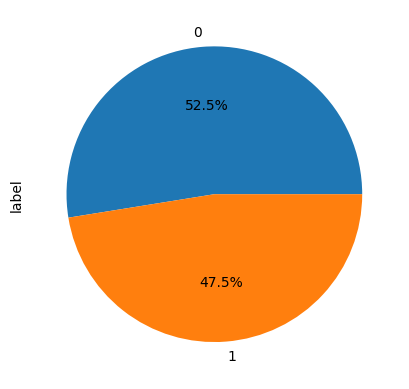

In [44]:
df3['label'].value_counts().plot(kind = 'pie',autopct="%.1f%%")
df3['label'].value_counts()

**Number of words in each text**

Text(0.5, 0.98, 'Words in texts')

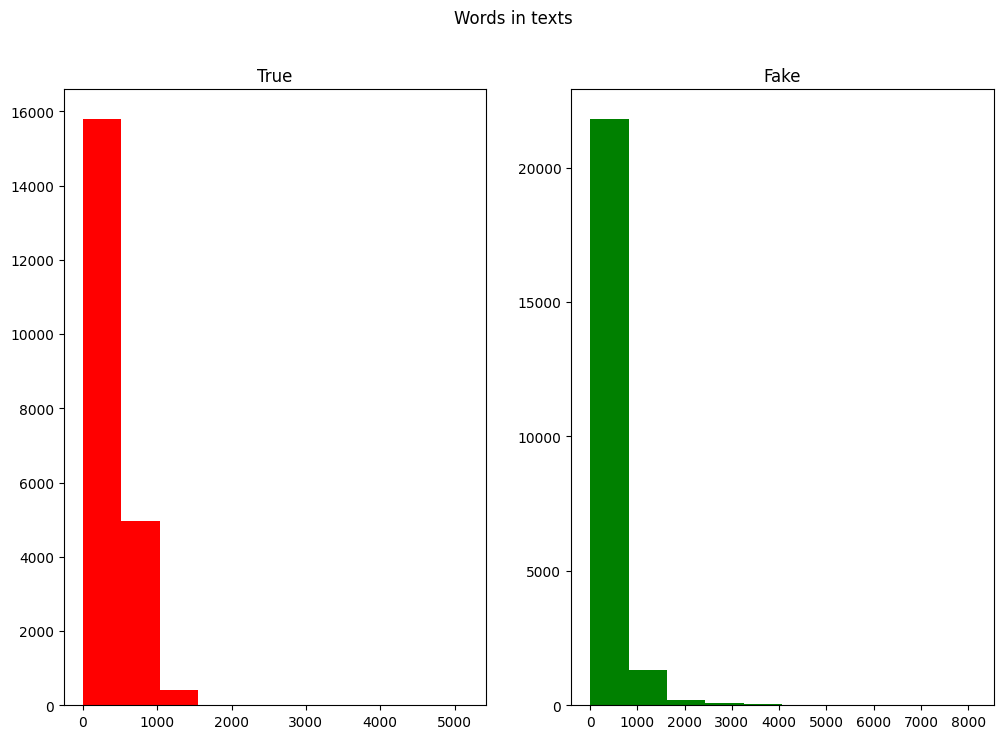

In [45]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=df3[df3['label']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='red')
ax1.set_title('True')
text_len=df3[df3['label']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='green')
ax2.set_title('Fake')
fig.suptitle('Words in texts')


**Types Types of subject in Fake dataset**

<Axes: ylabel='subject'>

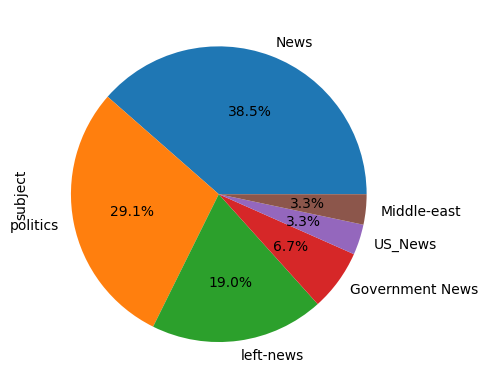

In [46]:
df['subject'].value_counts().plot(kind = 'pie',autopct="%.1f%%")

**Types Types of subject in True dataset**

<Axes: ylabel='subject'>

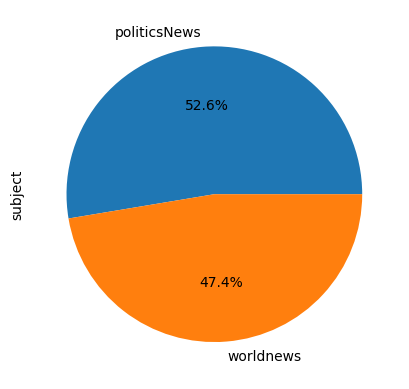

In [47]:
df1['subject'].value_counts().plot(kind = 'pie',autopct="%.1f%%")

In [48]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44688 entries, 0 to 44896
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     44688 non-null  object
 1   text      44688 non-null  object
 2   subject   44688 non-null  object
 3   date      44688 non-null  object
 4   label     44688 non-null  int32 
 5   num_char  44688 non-null  int64 
dtypes: int32(1), int64(1), object(4)
memory usage: 2.2+ MB


**Word Cloud**

In [ ]:

from wordcloud import WordCloud

fake_df=df3[df3["label"] == 0]
all_words=' '.join([text for text in fake_df.text])

wordcloud= WordCloud(width=800, height=500,
                         max_font_size=110,
                         collocations=False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

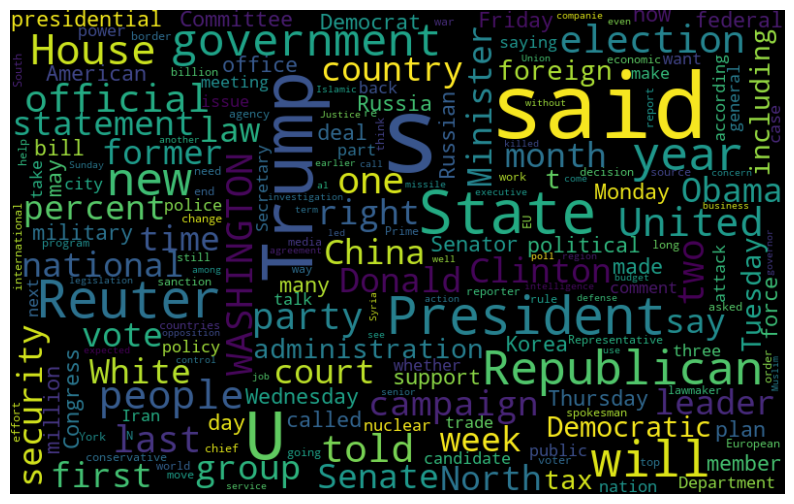

In [24]:
from wordcloud import WordCloud

fake_df=df3[df3["label"] == 1]
all_words=' '.join([text for text in fake_df.text])

wordcloud= WordCloud(width=800, height=500,
                         max_font_size=110,
                         collocations=False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

**Converting the text into the same case**

In [21]:
df['text']=df['text'].apply(lambda x:x.lower())
df1['text']=df1['text'].apply(lambda x:x.lower())
df3['text']=df3['text'].apply(lambda x:x.lower())

**Remove special characters, punctuation, and numbers**

In [23]:
def remove_special_chars(text):
    if pd.isna(text) or isinstance(text, float):
        return text
    
    # Remove special characters and punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove leading/trailing whitespaces
    text = text.strip()
    return text


In [ ]:
df3['text'] = df3['text'].apply(remove_special_chars)

In [21]:
stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))
df1['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))
df3['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

**Count Word Frequencies for True News (Unigrams)**

In [46]:
true_news_dataset = df1['text'].tolist()
true_word_freq = Counter()
for text in true_news_dataset:
    text = str(text) # Convert the DataFrame object to a string
    text = preprocess_text(text)
    tokens = nltk.word_tokenize(text)
    true_word_freq.update(tokens)


**Sort and Extract the Top 50 Words for True News (Unigrams)**

In [47]:
true_sorted_words = sorted(true_word_freq.items(), key=lambda x: x[1], reverse=True)
true_top_50_words = [(word, freq) for word, freq in true_sorted_words[:100]]
fake_news_dataset = df['text'].tolist()

In [48]:
fake_word_freq = Counter()
for text in fake_news_dataset:
    text = str(text)  
    text = preprocess_text(text)
    tokens = nltk.word_tokenize(text)
    fake_word_freq.update(tokens)

**Sort and Extract the Top 50 Words for Fake News (Unigrams)**

In [49]:
fake_sorted_words = sorted(fake_word_freq.items(), key=lambda x: x[1], reverse=True)
fake_top_50_words = [(word, freq) for word, freq in fake_sorted_words[:100]]


**Count Word Frequencies for True News (Bigrams)**

In [50]:
true_word_freq_bigram = Counter()
for text in true_news_dataset:
    text = str(text)  # Convert the DataFrame object to a string
    text = preprocess_text(text)
    tokens = nltk.word_tokenize(text)
    bigrams = ngrams(tokens, 2)  # Generate bigrams
    true_word_freq_bigram.update(bigrams)

**Sort and Extract the Top 50 Words for True News (Bigrams)**

In [51]:
true_sorted_words_bigram = sorted(true_word_freq_bigram.items(), key=lambda x: x[1], reverse=True)
true_top_50_words_bigram = [(word, freq) for word, freq in true_sorted_words_bigram[:100]]

**Count Word Frequencies for Fake News (Bigrams)**

In [52]:
fake_word_freq_bigram = Counter()
for text in fake_news_dataset:
    text = str(text)  # Convert the DataFrame object to a string
    text = preprocess_text(text)
    tokens = nltk.word_tokenize(text)
    bigrams = ngrams(tokens, 2)  # Generate bigrams
    fake_word_freq_bigram.update(bigrams)

**Sort and Extract the Top 50 Words for Fake News (Bigrams)**

In [53]:
fake_sorted_words_bigram = sorted(fake_word_freq_bigram.items(), key=lambda x: x[1], reverse=True)
fake_top_50_words_bigram = [(word, freq) for word, freq in fake_sorted_words_bigram[:100]]

**Create Excel file and save common words (Unigrams and Bigrams)**

In [54]:
df_common_words = pd.DataFrame({
    'True News (Unigrams)': true_top_100_words,
    'Fake News (Unigrams)': fake_top_100_words,
    'True News (Bigrams)': true_top_100_words_bigram,
    'Fake News (Bigrams)': fake_top_100_words_bigram
})
df_common_words.to_excel('common_words_unigram_bigram5.xlsx', index=False, encoding='utf-8-sig')


C:\Users\User\anaconda3\lib\site-packages\pandas\util\_decorators.py:211: FutureWarning: the 'encoding' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'encoding'
  return func(*args, **kwargs)


**Created a list of most commmon words**

In [49]:
custom_stopwords = [
    'according', 'administration', 'also', 'america', 'american', 'americans', 'another',
    'back', 'bill', 'black', 'called', 'campaign', 'clinton', 'could',
    'country', 'day', 'department', 'donald', 'election', 'even', 'every', 'fact', 'first',
    'former', 'fox', 'get', 'go', 'going', 'good', 'government', 'group', 'hillary',
    'house', 'image', 'it', 'know', 'last', 'law', 'like', 'made', 'make', 'man', 'many',
    'may', 'media', 'much', 'national', 'never', 'new', 'news', 'obama', 'office',
    'one', 'party', 'people', 'police', 'political', 'president', 'presidential', 'public',
    'really', 'republican', 'republicans', 'right', 'said', 'say', 'says', 'see',
    'show', 'since', 'state', 'states', 'still', 'support', 'take', 'think', 'time',
    'told', 'trump', 'two', 'united', 'us', 'via', 'video', 'vote', 'want', 'way', 'well',
    'white', 'women', 'world', 'would', 'year', 'years'
]


**There are more than 44000 rows so training takes too much time.To reduce traning time i have take only half dataset**

In [50]:
df6 = df3[['text','label']]

In [52]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44688 entries, 0 to 44896
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44688 non-null  object
 1   label   44688 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 872.8+ KB


**Text Preprocessing and removing the custom stopwords**

In [53]:

def preprocess_text(text):
    # Remove special characters and digits
    text = re.sub(r'\W+|\d+', ' ', text)

    # Convert to lowercase
    text = text.lower()

    # Remove stopwords
    stop_words = set(stopwords.words('english') + custom_stopwords)
    text = ' '.join(word for word in text.split() if word not in stop_words)

    return text

# Apply preprocessing to the 'text' column
df6['processed_text'] = df6['text'].apply(preprocess_text)


C:\Users\User\AppData\Local\Temp\ipykernel_5552\4253923541.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['processed_text'] = df6['text'].apply(preprocess_text)


In [55]:
df6.head(2)

,text,label,processed_text
0,BERLIN (Reuters) - Germany s Angela Merkel beg...,1,berlin reuters germany angela merkel began tou...
1,Nothing like a good dose of Sheriff Clarke to ...,0,nothing dose sheriff clarke expose lies left s...


In [56]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44688 entries, 0 to 44896
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   text            44688 non-null  object
 1   label           44688 non-null  int32 
 2   processed_text  44688 non-null  object
dtypes: int32(1), object(2)
memory usage: 1.2+ MB


**Split the data into train test and split**

In [57]:
X = df6['processed_text']
y = df6['label']  # Assuming 'label' is the column containing the target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Model Buliding**

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# Define a list of models to evaluate
models = [
    ('SVC', SVC()),
    ('Random Forest', RandomForestClassifier()),
    ('Naive Bayes', MultinomialNB()),
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('AdaBoost', AdaBoostClassifier())
]

# Iterate over the models and evaluate them
for model_name, model in models:
    # Define the pipeline for the NLP model
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(max_features=5000)),
        ('clf', model)
    ])

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)

    # Calculate accuracy and precision
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)

    # Print the results
    print(f"Model: {model_name}")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Confusion Matrix:")
    print(confusion_mat)
    print("--------------------")


Model: SVC
Accuracy: 0.9930633251286641
Precision: 0.9924617196702002
Confusion Matrix:
[[4663   32]
 [  30 4213]]
--------------------
Model: Random Forest
Accuracy: 0.996531662564332
Precision: 0.9966981132075472
Confusion Matrix:
[[4681   14]
 [  17 4226]]
--------------------
Model: Naive Bayes
Accuracy: 0.9279480868203177
Precision: 0.9265228727186537
Confusion Matrix:
[[4385  310]
 [ 334 3909]]
--------------------
Model: Logistic Regression
Accuracy: 0.9859028865518012
Precision: 0.9835564951844021
Confusion Matrix:
[[4625   70]
 [  56 4187]]
--------------------
Model: Decision Tree
Accuracy: 0.993958379950772
Precision: 0.9948027403732578
Confusion Matrix:
[[4673   22]
 [  32 4211]]
--------------------
Model: AdaBoost
Accuracy: 0.9933989706869546
Precision: 0.9917724494593324
Confusion Matrix:
[[4660   35]
 [  24 4219]]
--------------------


**Custom prediction Using AdaBoost**

In [59]:

# Custom input text
custom_text = "Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t even allow him to rise above the gutter long enough to wish the American citizens a happy new year!  Bishop Talbert Swan (@TalbertSwan) December 31, 2017no one likes you  Calvin (@calvinstowell) December 31, 2017Your impeachment would make 2018 a great year for America, but I ll also accept regaining control of Congress.  Miranda Yaver (@mirandayaver) December 31, 2017Do you hear yourself talk? When you have to include that many people that hate you you have to wonder? Why do the they all hate me?  Alan Sandoval (@AlanSandoval13) December 31, 2017Who uses the word Haters in a New Years wish??  Marlene (@marlene399) December 31, 2017You can t just say happy new year?  Koren pollitt (@Korencarpenter) December 31, 2017Here s Trump s New Year s Eve tweet from 2016.Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don t know what to do. Love!  Donald J. Trump (@realDonaldTrump) December 31, 2016This is nothing new for Trump. He s been doing this for years.Trump has directed messages to his  enemies  and  haters  for New Year s, Easter, Thanksgiving, and the anniversary of 9/11. pic.twitter.com/4FPAe2KypA  Daniel Dale (@ddale8) December 31, 2017Trump s holiday tweets are clearly not presidential.How long did he work at Hallmark before becoming President?  Steven Goodine (@SGoodine) December 31, 2017He s always been like this . . . the only difference is that in the last few years, his filter has been breaking down.  Roy Schulze (@thbthttt) December 31, 2017Who, apart from a teenager uses the term haters?  Wendy (@WendyWhistles) December 31, 2017he s a fucking 5 year old  Who Knows (@rainyday80) December 31, 2017So, to all the people who voted for this a hole thinking he would change once he got into power, you were wrong! 70-year-old men don t change and now he s a year older.Photo by Andrew Burton/Getty Images."

# Preprocess the custom input text
preprocessed_text = preprocess_text(custom_text)

# Make prediction using the pipeline
prediction = pipeline.predict([preprocessed_text])

# Print the prediction
print("Prediction:", prediction)


Prediction: [0]


In [61]:
import joblib
filename = 'nlpmodel.pkl'
joblib.dump(pipeline, filename)

['nlpmodel.pkl']